In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


<function matplotlib.pyplot.show(close=None, block=None)>

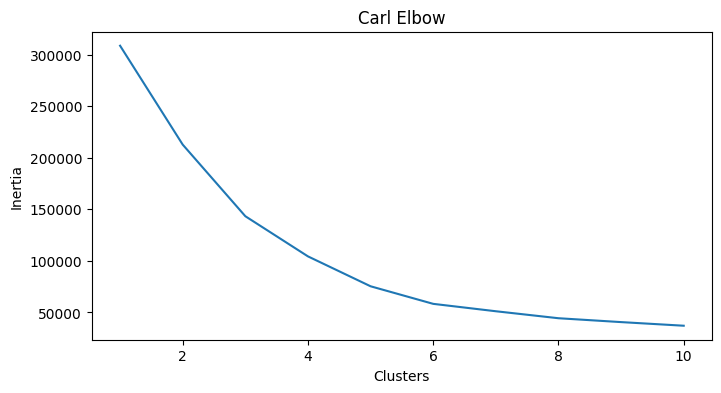

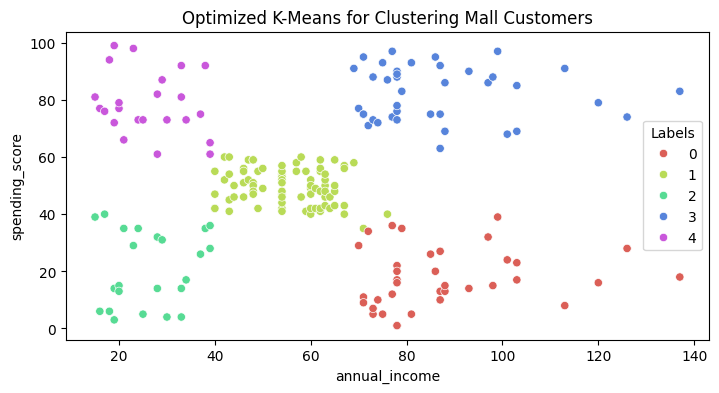

In [8]:
import pandas as pd
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# warning action
warnings.filterwarnings(action='ignore')

# sources
df = pd.read_csv('Mall_Customers.csv')

# preprocessing
df = df.rename(columns={'Genre': 'gender', 'Age': 'age', 'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'})
df['gender'].replace(['Female', 'Male'], [0, 1], inplace=True)
data = df.drop(['CustomerID', 'gender'], axis=1)

# create list, included inertia
clusters = []
for i in range(1, 11):
  km = KMeans(n_clusters=i).fit(data)
  clusters.append(km.inertia_)

# create inertia plot
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Carl Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# create KMeans object
km5 = KMeans(n_clusters=5).fit(data)

# add Label column on datasets
data['Labels'] = km5.labels_

# create Kmeans plot with 5 clusters
plt.figure(figsize=(8.3,4))
sns.scatterplot(x=data['annual_income'], y=data['spending_score'], hue=data['Labels'], palette=sns.color_palette('hls', 5))
plt.title('Optimized K-Means for Clustering Mall Customers')
plt.show